In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import Model,layers

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pzQhYsonvDzrZfiTVd75")
project = rf.workspace("nagesh-pwywk").project("skin-disease-spiyb")
dataset = project.version(1).download("folder")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin-Disease-1 in folder:: 100%|██████████| 4559/4559 [00:01<00:00, 4444.23it/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/Skin-Disease-1/train"
test_dir="/content/Skin-Disease-1/test"

In [ ]:
BATCH_SIZE=32

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2
                                   )

test_datagen = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = BATCH_SIZE,
                                                    subset='training',
                                                    class_mode = 'categorical',
                                                    target_size = (224,224))

validation_generator =  train_datagen.flow_from_directory( train_dir,
                                                          batch_size  = BATCH_SIZE,
                                                          subset='validation',
                                                          class_mode  = 'categorical',
                                                          target_size = (224,224))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  batch_size=1,
                                                  shuffle=False,
                                                  class_mode=None)


Found 3269 images belonging to 9 classes.
Found 814 images belonging to 9 classes.
Found 454 images belonging to 9 classes.


In [ ]:
densenetModel =DenseNet121(include_top=False,weights='imagenet',input_shape=(224,224,3))
for layers in densenetModel.layers:
  layers.trainable=False
x =Flatten()(densenetModel.output)
x=tensorflow.keras.layers.Dense(1024,activation="relu")(x)
x=tensorflow.keras.layers.Dense(9,activation="softmax")(x)
densenet_model=  Model(densenetModel.input,x)
from tensorflow.keras.optimizers import Adam,SGD

densenet_model.compile(loss = 'categorical_crossentropy', optimizer =SGD(lr=0.01), metrics = ['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
BATCH_SIZE=32
n_steps=train_generator.samples//BATCH_SIZE
n_val_steps= validation_generator.samples//BATCH_SIZE
densenet_history = densenet_model.fit(train_generator, batch_size=BATCH_SIZE,
                            epochs=25,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps)

Epoch 1/25
102/102 [==============================] - 83s 693ms/step - loss: 1.4897 - accuracy: 0.5999 - val_loss: 0.8882 - val_accuracy: 0.6550
Epoch 2/25
102/102 [==============================] - 58s 566ms/step - loss: 0.6538 - accuracy: 0.7668 - val_loss: 0.7977 - val_accuracy: 0.6875
Epoch 3/25
102/102 [==============================] - 67s 661ms/step - loss: 0.5024 - accuracy: 0.8162 - val_loss: 0.9420 - val_accuracy: 0.7250
Epoch 4/25
102/102 [==============================] - 58s 566ms/step - loss: 0.3746 - accuracy: 0.8610 - val_loss: 0.9056 - val_accuracy: 0.7125
Epoch 5/25
102/102 [==============================] - 67s 653ms/step - loss: 0.3272 - accuracy: 0.8777 - val_loss: 0.8788 - val_accuracy: 0.7362
Epoch 6/25
102/102 [==============================] - 67s 658ms/step - loss: 0.3215 - accuracy: 0.8838 - val_loss: 1.1425 - val_accuracy: 0.6900
Epoch 7/25
102/102 [==============================] - 67s 655ms/step - loss: 0.2709 - accuracy: 0.9015 - val_loss: 0.7676 - val_ac

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v, k) for k, v in class_indices.items())
densenet_preds = densenet_model.predict(test_generator)
pred_classes = np.argmax(densenet_preds, axis=1)

acc = accuracy_score(true_classes, pred_classes)
print("Accuracy: {:.2f}%".format(acc * 100))

454/454 [==============================] - 13s 15ms/step
Accuracy: 92.07%


In [ ]:
import numpy as np
densenet_pred_classes = np.argmax(densenet_preds,axis=1)
from sklearn.metrics import accuracy_score,precision_score
accuracy =accuracy_score(true_classes,densenet_pred_classes)
print(accuracy*100)

92.07048458149781


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
densenet_model.save("/content/drive/MyDrive/Skindensenet1.h5")
from keras.models import load_model
model =load_model("/content/drive/MyDrive/Skindensenet1.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
densenet_model.save("/content/drive/MyDrive/Densenetskin.keras")
from keras.models import load_model
model =load_model("/content/drive/MyDrive/Densenetskin.keras")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np




1/1 [==============================] - 0s 31ms/step
Predicted Disease: Actinic keratosis


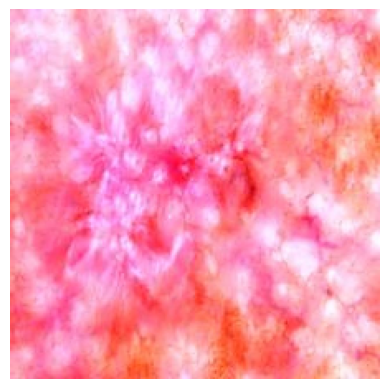

In [ ]:




img_path = '/content/Skin-Disease-1/train/Actinic keratosis/dr_0_1023_jpg.rf.d3e6b40620e19153a7c9e8cfac6019dc.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)


class_labels = ["Actinic keratosis", "Atopic dermatitis", "Benign keratosis", "Candidiasis Ringworm Tinea",
                "Dermatofibroma", "Melanocytic nevus", "Melonama", "Squamous cell carcinoma", "Vascular Lesion"]


pred = np.argmax(preds, axis=-1)


print("Predicted Disease:", class_labels[pred[0]])


plt.imshow(img)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 28ms/step
Predicted Disease: Atopic dermatitis


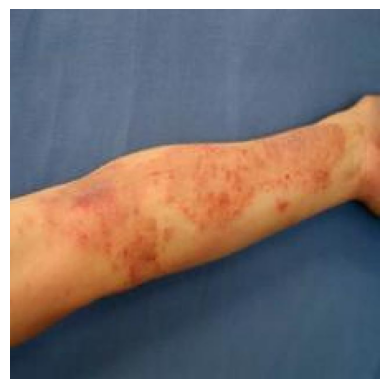

In [ ]:
img_path='/content/Skin-Disease-1/train/Atopic Dermatitis/dr_0_1232_jpg.rf.47d775dc1f73a04324f4f208e78aea1a.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

class_labels = ["Actinic keratosis", "Atopic dermatitis", "Benign keratosis", "Candidiasis Ringworm Tinea",
                "Dermatofibroma", "Melanocytic nevus", "Melonama", "Squamous cell carcinoma", "Vascular Lesion"]


pred = np.argmax(preds, axis=-1)

print("Predicted Disease:", class_labels[pred[0]])

plt.imshow(img)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 29ms/step
Predicted Disease: Benign keratosis


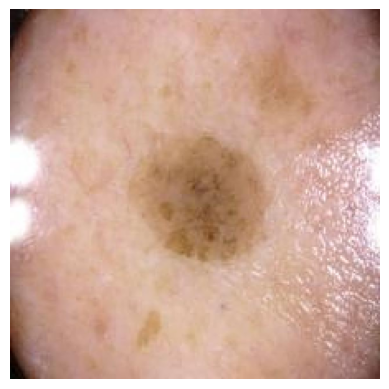

In [ ]:
img_path='/content/Skin-Disease-1/train/Benign keratosis/dr_0_3483_jpg.rf.99d1d4d272f81fa7eca24c0b8318c96b.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


preds = model.predict(x)


class_labels = ["Actinic keratosis", "Atopic dermatitis", "Benign keratosis", "Candidiasis Ringworm Tinea",
                "Dermatofibroma", "Melanocytic nevus", "Melonama", "Squamous cell carcinoma", "Vascular Lesion"]


pred = np.argmax(preds, axis=-1)


print("Predicted Disease:", class_labels[pred[0]])

plt.imshow(img)
plt.axis('off')
plt.show()


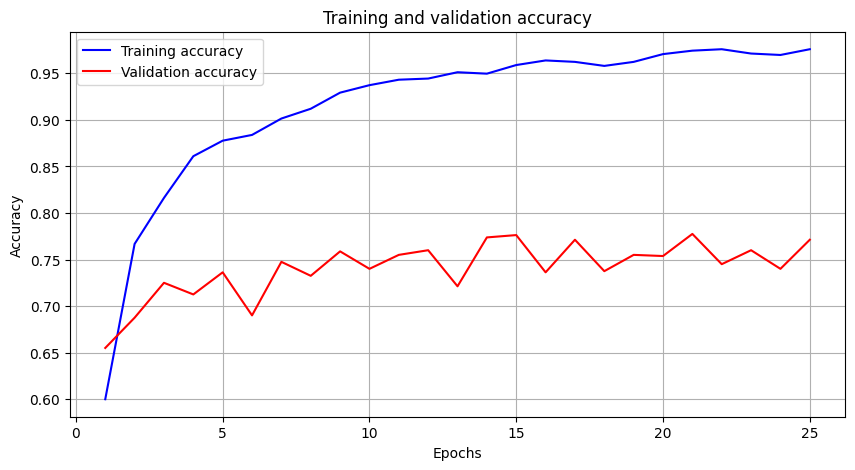

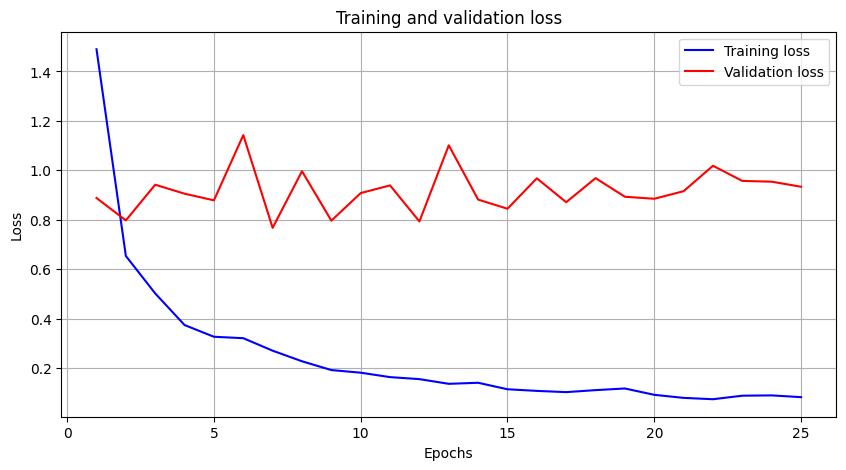

In [ ]:
import matplotlib.pyplot as plt

acc = densenet_history.history['accuracy']
val_acc = densenet_history.history['val_accuracy']
loss = densenet_history.history['loss']
val_loss = densenet_history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

